# Projeto 2 - Ciência dos Dados

## Teste AB

 Bruno Xavier - 2B, 
 Leonardo medeiros - 2C, 
 Lucas Chen - 2C e 
 William Palmieri - 2A 

<p>O seguinte projeto constitui-se em fazer um teste AB, ou seja, medir o desempenho de duas versões de um objeto a fim de tirar conclusões sobre qual das duas é a melhor. Iremos comparar duas versões de um portfólio criado como projeto da disciplina de Co-Design de Apps. No tipo A, o portifólio ficou igual ao original, enquanto que no tipo B, as imagens das categorias e dos projetos foram retiradas.</p>

<img src="TipoAB.png">


<p>O teste constitui-se em analisar o tempo que os usuários do portifólio demoram para achar um projeto específico (no caso, o jogo da velha feito no 1° Semestre).</p>

Coletamos os dados de tempo que cada usuário levou usando o Firebase.

Iremos então exportar os dados do Firebase e transformá-los em uma tabela utilizável.

In [1]:
import pandas as pd
import json
import itertools
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

In [2]:
arquivo = open("C:\\Users\\1234\\Desktop\\Insper\\2° Semestre\\Ciência dos dados\\GitHub CD\\CD\\Projeto2\\export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [3]:
for k,v in dados_fire["logs"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [4]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [5]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [6]:
dataframe

,tempo,tipo,user_id,versao
0,1479321852407,inicio,1386160978,B
1,1479330742229,final,3332280950,A
2,1479324105990,inicio,3839108837,A
3,1479333885389,final,6930556,B
4,1479329136782,inicio,612948909,A
5,1479325449554,inicio,572274542,B
6,1479323072672,inicio,2800236100,B
7,1479329019757,final,1110907384,A
8,1479324037966,inicio,201603664,B
9,1479323768088,inicio,3211109805,B


Após obtermos a tabela, devemos calcular o Delta T.

In [7]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [8]:
users = set(dataframe.user_id) # Fazer com que cada usuário apareça apenas uma vez

In [9]:
users = list(users)

In [10]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Checar para ver se cada usuário tem um par (começo e fim)
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [11]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [12]:
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos

In [13]:
dataframe_resumo

,delta_t,user_id,versao
0,11.648,1010704001,A
1,56994.526,2689064708,B
2,27.710,3541680390,B
3,18.128,2725705737,A
4,21.944,2627218697,A
5,34.530,2627218697,B
6,30.584,1955712139,B
7,47.050,4214608654,A
8,26.417,2693455507,B
9,132.972,4265449876,A


Agora criamos duas tabelas, uma apenas com a versão A e a outra com a B.

In [14]:
dataA = dataframe_resumo[(dataframe_resumo.versao == "A")]
dataB = dataframe_resumo[(dataframe_resumo.versao == "B")]

Percebemos então que existiam valores que não faziam sentido, como, por exemplo, usuários que haviam demorado horas para completar a tarefa, então excluímos esses valores, obtendo as duas tabelas finais que usamos para realisar os resto do projeto.

#### Tabela dos valores da versão A

In [35]:
dataA2 = dataA[(dataA.delta_t < 60) & (dataA.delta_t > 0)]
dataA2

,delta_t,user_id,versao
0,11.648,1010704001,A
3,18.128,2725705737,A
4,21.944,2627218697,A
7,47.050,4214608654,A
13,24.901,1412266781,A
14,12.678,3107040542,A
22,16.142,18180541,A
23,28.954,1367474880,A
25,17.212,2527838409,A
36,23.238,753415774,A


#### Tabela dos valores da versão B

In [16]:
dataB2 = dataB[(dataB.delta_t < 60) & (dataB.delta_t > 0)]
dataB2

,delta_t,user_id,versao
2,27.710,3541680390,B
5,34.530,2627218697,B
6,30.584,1955712139,B
8,26.417,2693455507,B
12,38.652,1626090651,B
15,7.445,1829569949,B
16,5.598,158843299,B
19,14.252,3211109805,B
21,24.248,3412190653,B
26,4.516,3185562697,B


### Fazendo a análise estatística 

<p> Agora que temos as duas tabelas separadas, podemos começar a análise.</p>
<p>Inicialmente, é importante saber que, à cada um dos usuários, foi dado aleatótiamente o tipo A ou o tipo B. Sendo assim, podemos afirmar que as amostras foram tiradas da mesma população.</p>
<p> Além disso, é seguro afirmar que os os dados são independentes, dado que não foi permitido que os usuários fizessem duas vezes o teste </p>
<p> Iniciaremos então, calculando as médias, variâncias e commprimento das populações. </p>

In [18]:
dataAtempo = dataA2.delta_t

mediaA = dataAtempo.mean()
varA = dataAtempo.var()
dpA = math.sqrt(varA)
nA = len(dataAtempo)

print("Média A: {0}".format(mediaA))
print("Variância A: {0}".format(varA))
print("O desvio padrão do site A é: {0}".format(dpA))
print("Comprimento da população do teste A: {0}".format(nA))

Média A: 23.847789473684212
Variância A: 167.90078595321634
O desvio padrão do site A é: 12.957653566646098
Comprimento da população do teste A: 19


In [19]:
dataBtempo = dataB2.delta_t

mediaB = dataBtempo.mean()
varB = dataBtempo.var()
dpB = math.sqrt(varB)
nB = len(dataBtempo)

print("Média B: {0}".format(mediaB))
print("Variância B: {0}".format(varB))
print("O desvio padrão do site B é: {0}".format(dpB))
print("Comprimento da população do teste B: {0}".format(nB))

Média B: 16.906909090909092
Variância B: 119.37744951515151
O desvio padrão do site B é: 10.92599878798966
Comprimento da população do teste B: 22


Agora, iremos plotar as populações para verificar quais são as suas distribuições.

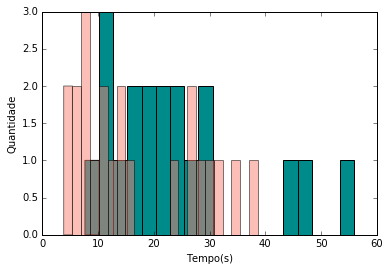

In [26]:
plt.hist(dataAtempo, bins=19, color = "darkcyan")
plt.hist(dataBtempo, bins=22, alpha=0.5, color = "salmon")
plt.xlabel("Tempo(s)")
plt.ylabel("Quantidade")

<p> Tendo os dados em mãos, iremos formular as hipóteses </p>
<p> Como nós queremos comparar o tempo gasto pelos usuários, e vimos na matéria de Co-Design que colocar imagens é mais  agradável ao usuário, teremos que</p>
#### H0 -->  ua  =<  ub
#### Ha -->  ua   >   ub

<p> Dado sua maior utilização na literatura, adotaremos, então, alfa = 0.05 </p>

<p> Como a Variância da população é desconhecida, não sabemos se são iguais ou não. Assim, consideraremos que as variâncias populacionais são diferentes.</p>

Usaremos então, um estimador D

In [21]:
ED = (mediaA - mediaB)
print ("O estimador será: ", ED)

O estimador será:  6.94088038277512


In [22]:
varAB = math.sqrt(varA/nA +varB/nB)
print("A variância do conjunto de sites AB é {0}".format(varAB))

dpAB = math.sqrt(varAB)
print("O desvio padrão do conjunto de sites AB é {0}".format(dpAB))

A variância do conjunto de sites AB é 3.776656083952585
O desvio padrão do conjunto de sites AB é 1.943362056836704


<p>Como as variâncias populacionais são desconhecidas, usaremos as variâncias amostrais Sa e Sb em seus lugares. Consideremos a variável T que segue a fórmula:</p>
<img src="t.jpg">

<p>Ou seja, a variável é dada pela distribuição T de Student, que necessitará do parâmetro "graus de liberdade" dado pela equação: </p>
<img src="v.jpg">

In [23]:
T = ED / varAB
print ("T: ", T)

T:  1.8378375548326102


In [24]:
v = ((varA/nA + varB/nB)**2)/((varA/nA)**2/(nA-1)+(varB/nB)**2/(nB-1))
print("O grau de liberdade do conjunto de sites AB é {0}".format(v))

O grau de liberdade do conjunto de sites AB é 35.4391015067037


Dado que assumimos alfa = 0.05, calcularemos o T tcrítico

In [32]:
Ttc = scipy.stats.t.ppf(0.05, df=v)
print ("T tcrítico vale: ", Ttc)

T tcrítico vale:  -1.68900361893


Calcularemos agora o valor T da reta que obtivemos para a média

In [34]:
t = scipy.stats.t.cdf(T, v)
Tm = scipy.stats.t.ppf(t, v)
print ("Tmédia vale: ", Tm)

Tmédia vale:  1.83783754851


H0 dizia que ua deveria ser menor ou igual à ub, entretanto, ao fazermos as contas, o resultado obtido ficou muito fora do nível de significância. Assim, deveremos rejeitar H0. 

<p> A rejeição de H0 implica em falar que o site tipo B tem uma melhor navegabilidade em relação ao tipo A quando a tarefa é achar o projeto "Jogo da velha". Poderíamos atribuir esse feito à maior proximidade dos quadros quando se retira as imagens, fazendo com que seja mais rápida a navegação.</p> 
<p> Se os princípios CRAP nos dizem que imagens facilitam e melhoram a usabilidade, não levam em conta que uma fonte grande também facilita a leitura.</p>
<p> Além disso, no site tipo A, as imagens não funcionavam como link, assim, faziam com que usuários das plataformas touch perdessem tempo, enquanto que no tipo B, havia apenas os títulos para serem clicados.</p>